In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [82]:
df=pd.read_csv('Coffee-modified.csv')

In [83]:
df

,ID,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.00,1800.00,1700.00
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.00,2200.00,2000.00
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,1307,Arabica,juan carlos garcia lopez,Mexico,el centenario,NaN,"la esperanza, municipio juchique de ferrer, ve...",1104328663,terra mia,900,...,None,20,"September 17th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,900.00,900.00,900.00
1307,1308,Arabica,myriam kaplan-pasternak,Haiti,200 farms,NaN,coeb koperativ ekselsyo basen (350 members),NaN,haiti coffee,~350m,...,Blue-Green,16,"May 24th, 2013",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,350.00,350.00,350.00
1308,1309,Arabica,"exportadora atlantic, s.a.",Nicaragua,finca las marÃ­as,017-053-0211/ 017-053-0212,beneficio atlantic condega,017-053-0211/ 017-053-0212,exportadora atlantic s.a,1100,...,Green,5,"June 6th, 2018",Instituto HondureÃ±o del CafÃ©,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1100.00,1100.00,1100.00
1309,1310,Arabica,juan luis alvarado romero,Guatemala,finca el limon,NaN,beneficio serben,11/853/165,unicafe,4650,...,Green,4,"May 24th, 2013",Asociacion Nacional Del CafÃ©,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,ft,1417.32,1417.32,1417.32


In [84]:
df=df[['Total.Cup.Points','Species','Country.of.Origin','Processing.Method','Aroma','Flavor','Aftertaste','Acidity','Body','Balance','Uniformity','Moisture','altitude_mean_meters']]

In [85]:
df

,Total.Cup.Points,Species,Country.of.Origin,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,altitude_mean_meters
0,90.58,Arabica,Ethiopia,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.00,0.12,2075.00
1,89.92,Arabica,Ethiopia,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.00,0.12,2075.00
2,89.75,Arabica,Guatemala,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.00,0.00,1700.00
3,89.00,Arabica,Ethiopia,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.00,0.11,2000.00
4,88.83,Arabica,Ethiopia,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.00,0.12,2075.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,68.33,Arabica,Mexico,Washed / Wet,7.08,6.83,6.25,7.42,7.25,6.75,10.00,0.11,900.00
1307,67.92,Arabica,Haiti,Natural / Dry,6.75,6.58,6.42,6.67,7.08,6.67,9.33,0.14,350.00
1308,63.08,Arabica,Nicaragua,Other,7.25,6.58,6.33,6.25,6.42,6.08,6.00,0.13,1100.00
1309,59.83,Arabica,Guatemala,Washed / Wet,7.50,6.67,6.67,7.67,7.33,6.67,8.00,0.10,1417.32


In [86]:
df=df.dropna()

In [87]:
df

,Total.Cup.Points,Species,Country.of.Origin,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,altitude_mean_meters
0,90.58,Arabica,Ethiopia,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.00,0.12,2075.00
1,89.92,Arabica,Ethiopia,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.00,0.12,2075.00
3,89.00,Arabica,Ethiopia,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.00,0.11,2000.00
4,88.83,Arabica,Ethiopia,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.00,0.12,2075.00
9,88.25,Arabica,Ethiopia,Natural / Dry,8.08,8.58,8.50,8.50,7.67,8.42,10.00,0.10,1822.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,69.17,Arabica,Honduras,Washed / Wet,7.00,6.33,6.17,6.50,6.67,6.17,8.00,0.10,1450.00
1306,68.33,Arabica,Mexico,Washed / Wet,7.08,6.83,6.25,7.42,7.25,6.75,10.00,0.11,900.00
1307,67.92,Arabica,Haiti,Natural / Dry,6.75,6.58,6.42,6.67,7.08,6.67,9.33,0.14,350.00
1308,63.08,Arabica,Nicaragua,Other,7.25,6.58,6.33,6.25,6.42,6.08,6.00,0.13,1100.00


In [88]:
df.describe()

,Total.Cup.Points,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,altitude_mean_meters
count,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000
mean,82.126949,7.567488,7.513779,7.385633,7.526221,7.504287,7.499302,9.870219,0.094985,1816.792017
std,2.631610,0.301361,0.324487,0.332735,0.307827,0.272824,0.340801,0.445371,0.043468,9112.472930
min,59.830000,5.080000,6.170000,6.170000,5.250000,6.330000,6.080000,6.000000,0.000000,1.000000
25%,81.170000,7.420000,7.330000,7.170000,7.330000,7.330000,7.330000,10.000000,0.100000,1100.000000
50%,82.420000,7.580000,7.500000,7.420000,7.500000,7.500000,7.500000,10.000000,0.110000,1310.640000
75%,83.580000,7.750000,7.670000,7.580000,7.670000,7.670000,7.670000,10.000000,0.120000,1600.000000
max,90.580000,8.750000,8.830000,8.670000,8.750000,8.500000,8.580000,10.000000,0.170000,190164.000000


In [89]:
Y_df=df['Total.Cup.Points']
df=df.drop(columns='Total.Cup.Points')
Y_df

0       90.58
1       89.92
3       89.00
4       88.83
9       88.25
        ...  
1305    69.17
1306    68.33
1307    67.92
1308    63.08
1309    59.83
Name: Total.Cup.Points, Length: 1003, dtype: float64

In [90]:
df

,Species,Country.of.Origin,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,altitude_mean_meters
0,Arabica,Ethiopia,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.00,0.12,2075.00
1,Arabica,Ethiopia,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.00,0.12,2075.00
3,Arabica,Ethiopia,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.00,0.11,2000.00
4,Arabica,Ethiopia,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.00,0.12,2075.00
9,Arabica,Ethiopia,Natural / Dry,8.08,8.58,8.50,8.50,7.67,8.42,10.00,0.10,1822.50
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,Arabica,Honduras,Washed / Wet,7.00,6.33,6.17,6.50,6.67,6.17,8.00,0.10,1450.00
1306,Arabica,Mexico,Washed / Wet,7.08,6.83,6.25,7.42,7.25,6.75,10.00,0.11,900.00
1307,Arabica,Haiti,Natural / Dry,6.75,6.58,6.42,6.67,7.08,6.67,9.33,0.14,350.00
1308,Arabica,Nicaragua,Other,7.25,6.58,6.33,6.25,6.42,6.08,6.00,0.13,1100.00


In [91]:
X_df=df['altitude_mean_meters']
X_df

0       2075.00
1       2075.00
3       2000.00
4       2075.00
9       1822.50
         ...   
1305    1450.00
1306     900.00
1307     350.00
1308    1100.00
1309    1417.32
Name: altitude_mean_meters, Length: 1003, dtype: float64

In [92]:
rating_pctile = np.percentile( Y_df, [75, 90])
Y_list = []
grade1 = 0
grade2 = 0
grade3 = 0
for i in Y_df:
    if (i < rating_pctile[0]): 
        Bean_grade = 1
        Y_list.append(Bean_grade)
        grade1=grade1+1
    if (rating_pctile[0] <= i < rating_pctile[1]): 
        Bean_grade = 2
        Y_list.append(Bean_grade)
        grade2=grade2+1 
    if (i >= rating_pctile[1]): 
        Bean_grade = 3
        Y_list.append(Bean_grade)
        grade3=grade3+1

figdata = pd.DataFrame([[1,grade1],[2,grade2],[3,grade3]],columns = ["Bean_grade","NSamples"])

In [93]:
fig = px.bar(figdata, x = 'Bean_grade', y = 'NSamples', color='NSamples', range_y=[0.0,1000])
fig.show()

In [94]:
Y_0 = pd.DataFrame()
Y_0['Bean_grade'] = Y_list
Y = Y_0['Bean_grade']

In [95]:
df_coffee_con = pd.DataFrame()
df_coffee_cat = pd.DataFrame()
for i in df:
    if df[i].dtypes != 'object':
        df_coffee_con[i] = df[i]
    else:
        df_coffee_cat[i] = df[i]

In [96]:
df_coffee_cat

,Species,Country.of.Origin,Processing.Method
0,Arabica,Ethiopia,Washed / Wet
1,Arabica,Ethiopia,Washed / Wet
3,Arabica,Ethiopia,Natural / Dry
4,Arabica,Ethiopia,Washed / Wet
9,Arabica,Ethiopia,Natural / Dry
...,...,...,...
1305,Arabica,Honduras,Washed / Wet
1306,Arabica,Mexico,Washed / Wet
1307,Arabica,Haiti,Natural / Dry
1308,Arabica,Nicaragua,Other


In [97]:
df_coffee_con

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,altitude_mean_meters
0,8.67,8.83,8.67,8.75,8.50,8.42,10.00,0.12,2075.00
1,8.75,8.67,8.50,8.58,8.42,8.42,10.00,0.12,2075.00
3,8.17,8.58,8.42,8.42,8.50,8.25,10.00,0.11,2000.00
4,8.25,8.50,8.25,8.50,8.42,8.33,10.00,0.12,2075.00
9,8.08,8.58,8.50,8.50,7.67,8.42,10.00,0.10,1822.50
...,...,...,...,...,...,...,...,...,...
1305,7.00,6.33,6.17,6.50,6.67,6.17,8.00,0.10,1450.00
1306,7.08,6.83,6.25,7.42,7.25,6.75,10.00,0.11,900.00
1307,6.75,6.58,6.42,6.67,7.08,6.67,9.33,0.14,350.00
1308,7.25,6.58,6.33,6.25,6.42,6.08,6.00,0.13,1100.00


In [98]:
list_column_df_coffee_con = []
for i in df_coffee_con.columns:
    list_column_df_coffee_con.append(i)
list_column_df_coffee_cat = []
for i in df_coffee_cat.columns:
    list_column_df_coffee_cat.append(i)

In [99]:
scale = preprocessing.StandardScaler()
df_coffee_con = pd.DataFrame(scale.fit_transform(df_coffee_con.values), columns=list_column_df_coffee_con, index=df_coffee_con.index)
df_coffee_con

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,altitude_mean_meters
0,3.660274,4.058342,3.861950,3.977528,3.651469,2.702919,0.291544,0.575762,0.028350
1,3.925869,3.565010,3.350779,3.424993,3.358094,2.702919,0.291544,0.575762,0.028350
3,2.000305,3.287510,3.110228,2.904961,3.651469,2.203845,0.291544,0.345595,0.020115
4,2.265900,3.040844,2.599057,3.164977,3.358094,2.438704,0.291544,0.575762,0.028350
9,1.701510,3.287510,3.350779,3.164977,0.607701,2.702919,0.291544,0.115428,0.000627
...,...,...,...,...,...,...,...,...,...
1305,-1.884024,-3.649978,-3.655275,-3.335427,-3.059490,-3.902470,-4.201335,0.115428,-0.040272
1306,-1.618429,-2.108314,-3.414724,-0.345241,-0.932520,-2.199748,0.291544,0.345595,-0.100659
1307,-2.714009,-2.879146,-2.903553,-2.782892,-1.555942,-2.434606,-1.213570,1.036097,-0.161046
1308,-1.054039,-2.879146,-3.174173,-4.147977,-3.976288,-4.166686,-8.694214,0.805930,-0.078700


In [100]:
data = df_coffee_con.corr()
data

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,altitude_mean_meters
Aroma,1.000000,0.730664,0.677823,0.603396,0.551581,0.611650,0.135270,-0.077636,-0.020067
Flavor,0.730664,1.000000,0.848104,0.752555,0.685150,0.734386,0.222574,-0.120497,-0.013267
Aftertaste,0.677823,0.848104,1.000000,0.690242,0.685350,0.764757,0.242037,-0.166140,-0.027426
Acidity,0.603396,0.752555,0.690242,1.000000,0.617736,0.644035,0.191687,-0.099542,0.003069
Body,0.551581,0.685150,0.685350,0.617736,1.000000,0.702057,0.132675,-0.201107,-0.019029
Balance,0.611650,0.734386,0.764757,0.644035,0.702057,1.000000,0.243083,-0.217252,-0.016694
Uniformity,0.135270,0.222574,0.242037,0.191687,0.132675,0.243083,1.000000,-0.005526,-0.012340
Moisture,-0.077636,-0.120497,-0.166140,-0.099542,-0.201107,-0.217252,-0.005526,1.000000,0.019164
altitude_mean_meters,-0.020067,-0.013267,-0.027426,0.003069,-0.019029,-0.016694,-0.012340,0.019164,1.000000


In [101]:
lower = pd.DataFrame(np.tril(data,-1),columns=data.columns)
lower

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,altitude_mean_meters
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.730664,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.677823,0.848104,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.603396,0.752555,0.690242,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.551581,0.685150,0.685350,0.617736,0.000000,0.000000,0.000000,0.000000,0.0
5,0.611650,0.734386,0.764757,0.644035,0.702057,0.000000,0.000000,0.000000,0.0
6,0.135270,0.222574,0.242037,0.191687,0.132675,0.243083,0.000000,0.000000,0.0
7,-0.077636,-0.120497,-0.166140,-0.099542,-0.201107,-0.217252,-0.005526,0.000000,0.0
8,-0.020067,-0.013267,-0.027426,0.003069,-0.019029,-0.016694,-0.012340,0.019164,0.0


In [102]:
to_drop = [column for column in lower if any(lower[column] > 0.8)]
df_coffee_con.drop(to_drop, inplace=True, axis=1)
df_coffee_con

,Aroma,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,altitude_mean_meters
0,3.660274,3.861950,3.977528,3.651469,2.702919,0.291544,0.575762,0.028350
1,3.925869,3.350779,3.424993,3.358094,2.702919,0.291544,0.575762,0.028350
3,2.000305,3.110228,2.904961,3.651469,2.203845,0.291544,0.345595,0.020115
4,2.265900,2.599057,3.164977,3.358094,2.438704,0.291544,0.575762,0.028350
9,1.701510,3.350779,3.164977,0.607701,2.702919,0.291544,0.115428,0.000627
...,...,...,...,...,...,...,...,...
1305,-1.884024,-3.655275,-3.335427,-3.059490,-3.902470,-4.201335,0.115428,-0.040272
1306,-1.618429,-3.414724,-0.345241,-0.932520,-2.199748,0.291544,0.345595,-0.100659
1307,-2.714009,-2.903553,-2.782892,-1.555942,-2.434606,-1.213570,1.036097,-0.161046
1308,-1.054039,-3.174173,-4.147977,-3.976288,-4.166686,-8.694214,0.805930,-0.078700


get_dummies = ทำOneHotแบบเลือกข้อมูลแล้งลงตารางได้เลย

In [103]:
zom = pd.get_dummies(df_coffee_cat, columns = list_column_df_coffee_cat)
zom

,Species_Arabica,Country.of.Origin_Brazil,Country.of.Origin_Burundi,Country.of.Origin_China,Country.of.Origin_Colombia,Country.of.Origin_Costa Rica,Country.of.Origin_Cote d?Ivoire,Country.of.Origin_Ecuador,Country.of.Origin_El Salvador,Country.of.Origin_Ethiopia,...,Country.of.Origin_Uganda,Country.of.Origin_United States,Country.of.Origin_United States (Puerto Rico),Country.of.Origin_Vietnam,Country.of.Origin_Zambia,Processing.Method_Natural / Dry,Processing.Method_Other,Processing.Method_Pulped natural / honey,Processing.Method_Semi-washed / Semi-pulped,Processing.Method_Washed / Wet
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
9,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1306,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1307,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1308,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [104]:
X = pd.DataFrame()
X = df_coffee_con.join(zom)
X

,Aroma,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,altitude_mean_meters,Species_Arabica,Country.of.Origin_Brazil,...,Country.of.Origin_Uganda,Country.of.Origin_United States,Country.of.Origin_United States (Puerto Rico),Country.of.Origin_Vietnam,Country.of.Origin_Zambia,Processing.Method_Natural / Dry,Processing.Method_Other,Processing.Method_Pulped natural / honey,Processing.Method_Semi-washed / Semi-pulped,Processing.Method_Washed / Wet
0,3.660274,3.861950,3.977528,3.651469,2.702919,0.291544,0.575762,0.028350,1,0,...,0,0,0,0,0,0,0,0,0,1
1,3.925869,3.350779,3.424993,3.358094,2.702919,0.291544,0.575762,0.028350,1,0,...,0,0,0,0,0,0,0,0,0,1
3,2.000305,3.110228,2.904961,3.651469,2.203845,0.291544,0.345595,0.020115,1,0,...,0,0,0,0,0,1,0,0,0,0
4,2.265900,2.599057,3.164977,3.358094,2.438704,0.291544,0.575762,0.028350,1,0,...,0,0,0,0,0,0,0,0,0,1
9,1.701510,3.350779,3.164977,0.607701,2.702919,0.291544,0.115428,0.000627,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,-1.884024,-3.655275,-3.335427,-3.059490,-3.902470,-4.201335,0.115428,-0.040272,1,0,...,0,0,0,0,0,0,0,0,0,1
1306,-1.618429,-3.414724,-0.345241,-0.932520,-2.199748,0.291544,0.345595,-0.100659,1,0,...,0,0,0,0,0,0,0,0,0,1
1307,-2.714009,-2.903553,-2.782892,-1.555942,-2.434606,-1.213570,1.036097,-0.161046,1,0,...,0,0,0,0,0,1,0,0,0,0
1308,-1.054039,-3.174173,-4.147977,-3.976288,-4.166686,-8.694214,0.805930,-0.078700,1,0,...,0,0,0,0,0,0,1,0,0,0


In [105]:
seed = 20
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=seed)

In [106]:
k = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 25, 35]
KNNScore_list = []
for i in k:
    modelKNN = KNeighborsClassifier(n_neighbors=i, p=2)
    modelKNN.fit(X_train,Y_train)
    y_pred= modelKNN.predict(X_test)
    KNNScore = accuracy_score(Y_test, y_pred)
    KNNScore_list.append(KNNScore)

Model Testing

In [107]:
KNNScore = pd.DataFrame()
KNNScore['k'] = k
KNNScore['KNN_Score'] = KNNScore_list

In [108]:
fig = px.bar( KNNScore, x = 'k', y = 'KNN_Score', color='KNN_Score', range_y=[0.7,1.0])
fig.show()

Visualize compare accuracy of selected k values (at least 3 values of k)

In [109]:
modelKNN = KNeighborsClassifier(n_neighbors=11, p=2)
modelKNN.fit(X_train,Y_train)
y_pred= modelKNN.predict(X_test)
print('Confusion Matrix: ')
print(confusion_matrix(Y_test, y_pred))
print('Classification Report: ')
print(classification_report(Y_test, y_pred))

Confusion Matrix: 
[[220   9   1]
 [ 11  29   1]
 [  0   8  22]]
Classification Report: 
              precision    recall  f1-score   support

           1       0.95      0.96      0.95       230
           2       0.63      0.71      0.67        41
           3       0.92      0.73      0.81        30

    accuracy                           0.90       301
   macro avg       0.83      0.80      0.81       301
weighted avg       0.90      0.90      0.90       301



Decision Tree parameter

In [110]:
ASM_function = ['entropy', 'gini'] 
maxD = [4, 5, 6, None] # try at least 2 values
for i in ASM_function:
    for j in maxD:
        ModelDT = DecisionTreeClassifier(criterion=i, splitter='best',max_depth = j )
        ModelDT.fit(X_train,Y_train)
        y_pred= ModelDT.predict(X_test)
        DTScore = accuracy_score(Y_test, y_pred)
        print('criterion = ',i,'max_depth = ',j)
        print(DTScore)

criterion =  entropy max_depth =  4
0.840531561461794
criterion =  entropy max_depth =  5
0.8504983388704319
criterion =  entropy max_depth =  6
0.8471760797342193
criterion =  entropy max_depth =  None
0.867109634551495
criterion =  gini max_depth =  4
0.840531561461794
criterion =  gini max_depth =  5
0.8571428571428571
criterion =  gini max_depth =  6
0.8704318936877077
criterion =  gini max_depth =  None
0.8637873754152824


In [111]:
a = "entropy"
b = 6
ModelDT = DecisionTreeClassifier(criterion = a, splitter='best',max_depth = b )
ModelDT.fit(X_train,Y_train)
# Model Testing
Y_pred = ModelDT.predict(X_test)
DTScore = accuracy_score(Y_test, Y_pred)
print("criterion = ",a,"max_depth =",b)
print(DTScore)
print('Confusion Matrix: ')
print(confusion_matrix(Y_test, Y_pred))
print('Classification Report: ')
print(classification_report(Y_test, Y_pred))

criterion =  entropy max_depth = 6
0.8504983388704319
Confusion Matrix: 
[[205  23   2]
 [  6  33   2]
 [  1  11  18]]
Classification Report: 
              precision    recall  f1-score   support

           1       0.97      0.89      0.93       230
           2       0.49      0.80      0.61        41
           3       0.82      0.60      0.69        30

    accuracy                           0.85       301
   macro avg       0.76      0.77      0.74       301
weighted avg       0.89      0.85      0.86       301



[1 2 3]


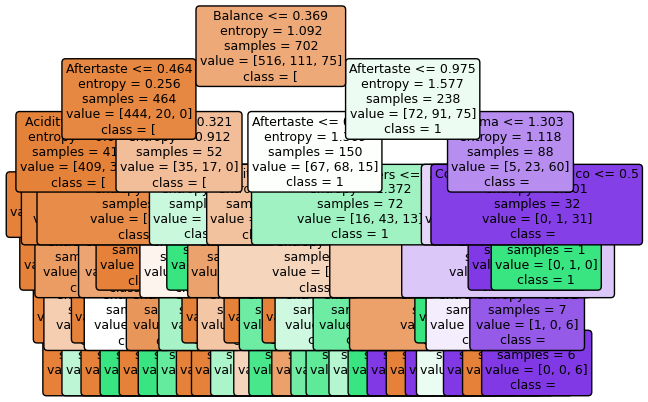

In [112]:
feature_names = X_train.columns
Labels = str(np.unique(Y_train))
print(Labels)
tree.plot_tree( ModelDT,feature_names = feature_names,class_names = Labels,rounded = True,filled = True, fontsize=9)
plt.show()

In [113]:
ASM_function = ['entropy', 'gini']
nEstimator = 50
nJob = 2
rState = 10

In [114]:
RandomF = RandomForestClassifier(criterion=ASM_function[1],n_estimators=nEstimator, n_jobs=nJob, random_state=rState)
RandomF.fit(X_train,Y_train)
y_pred= RandomF.predict(X_test)
RFScore = accuracy_score(Y_test, y_pred)
print(RFScore)
print('Confusion Matrix: ')
print(confusion_matrix(Y_test, y_pred))
print('Classification Report: ')
print(classification_report(Y_test, y_pred))

0.9003322259136213
Confusion Matrix: 
[[220   9   1]
 [ 10  28   3]
 [  0   7  23]]
Classification Report: 
              precision    recall  f1-score   support

           1       0.96      0.96      0.96       230
           2       0.64      0.68      0.66        41
           3       0.85      0.77      0.81        30

    accuracy                           0.90       301
   macro avg       0.81      0.80      0.81       301
weighted avg       0.90      0.90      0.90       301



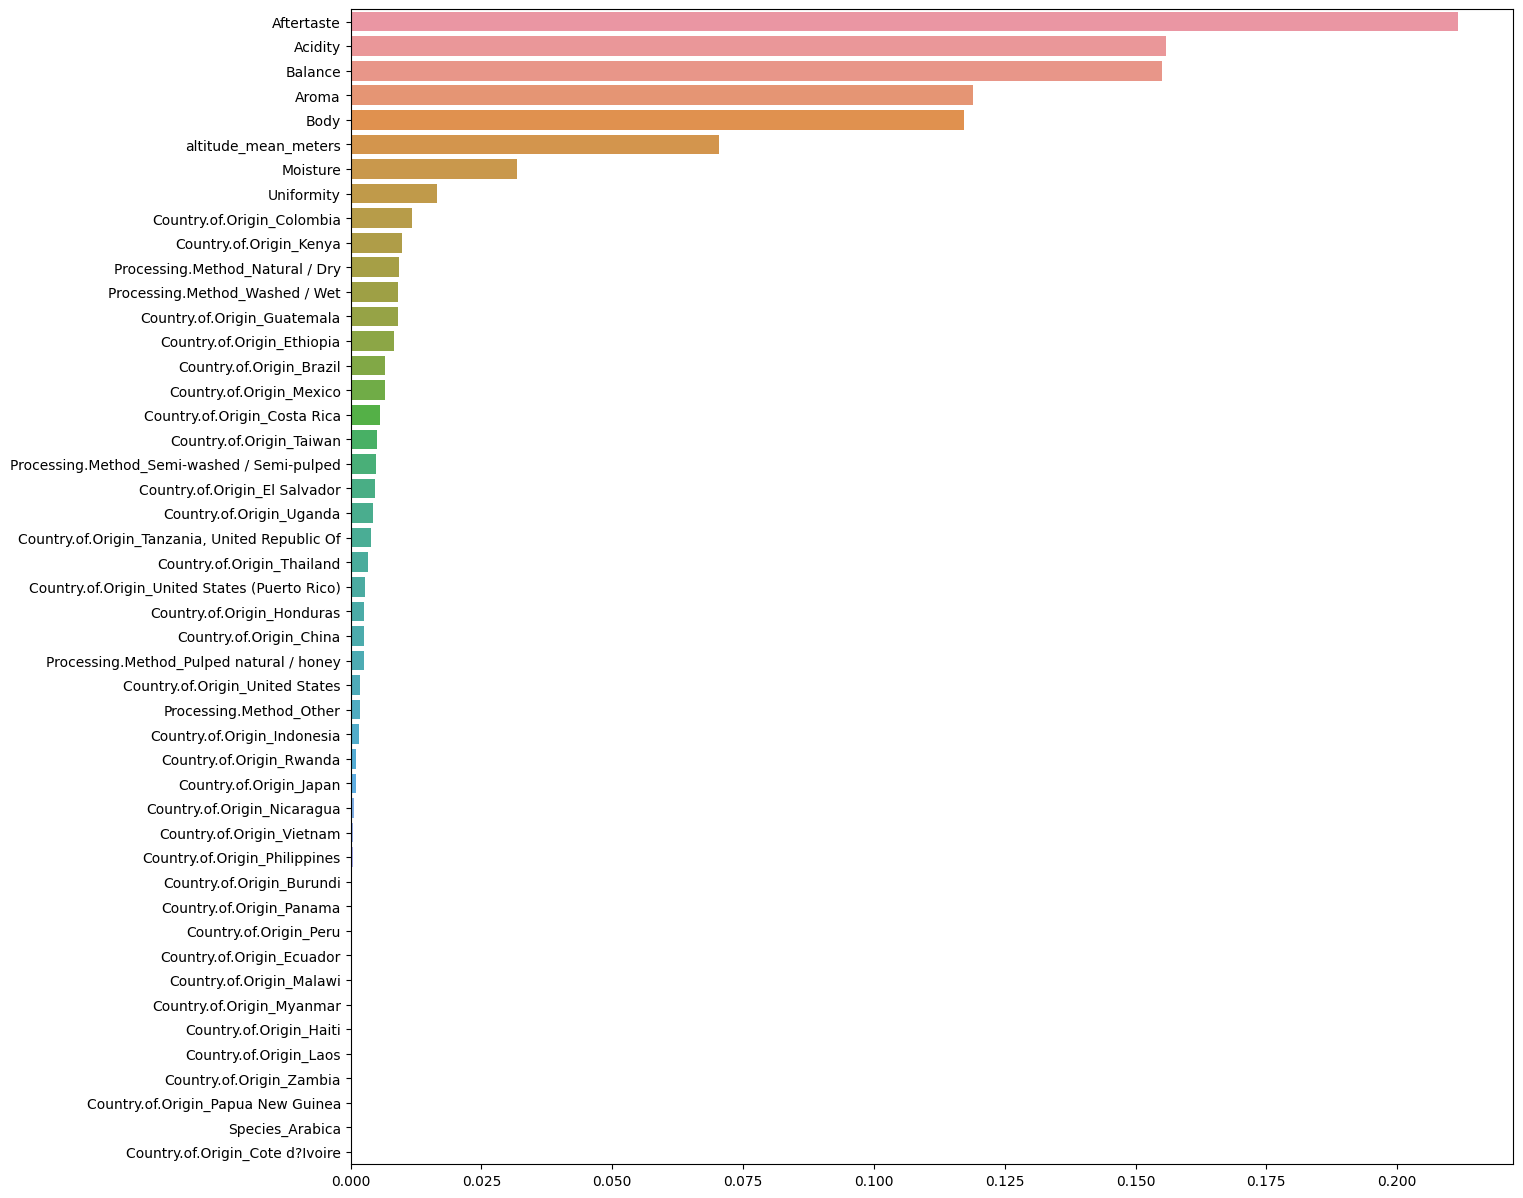

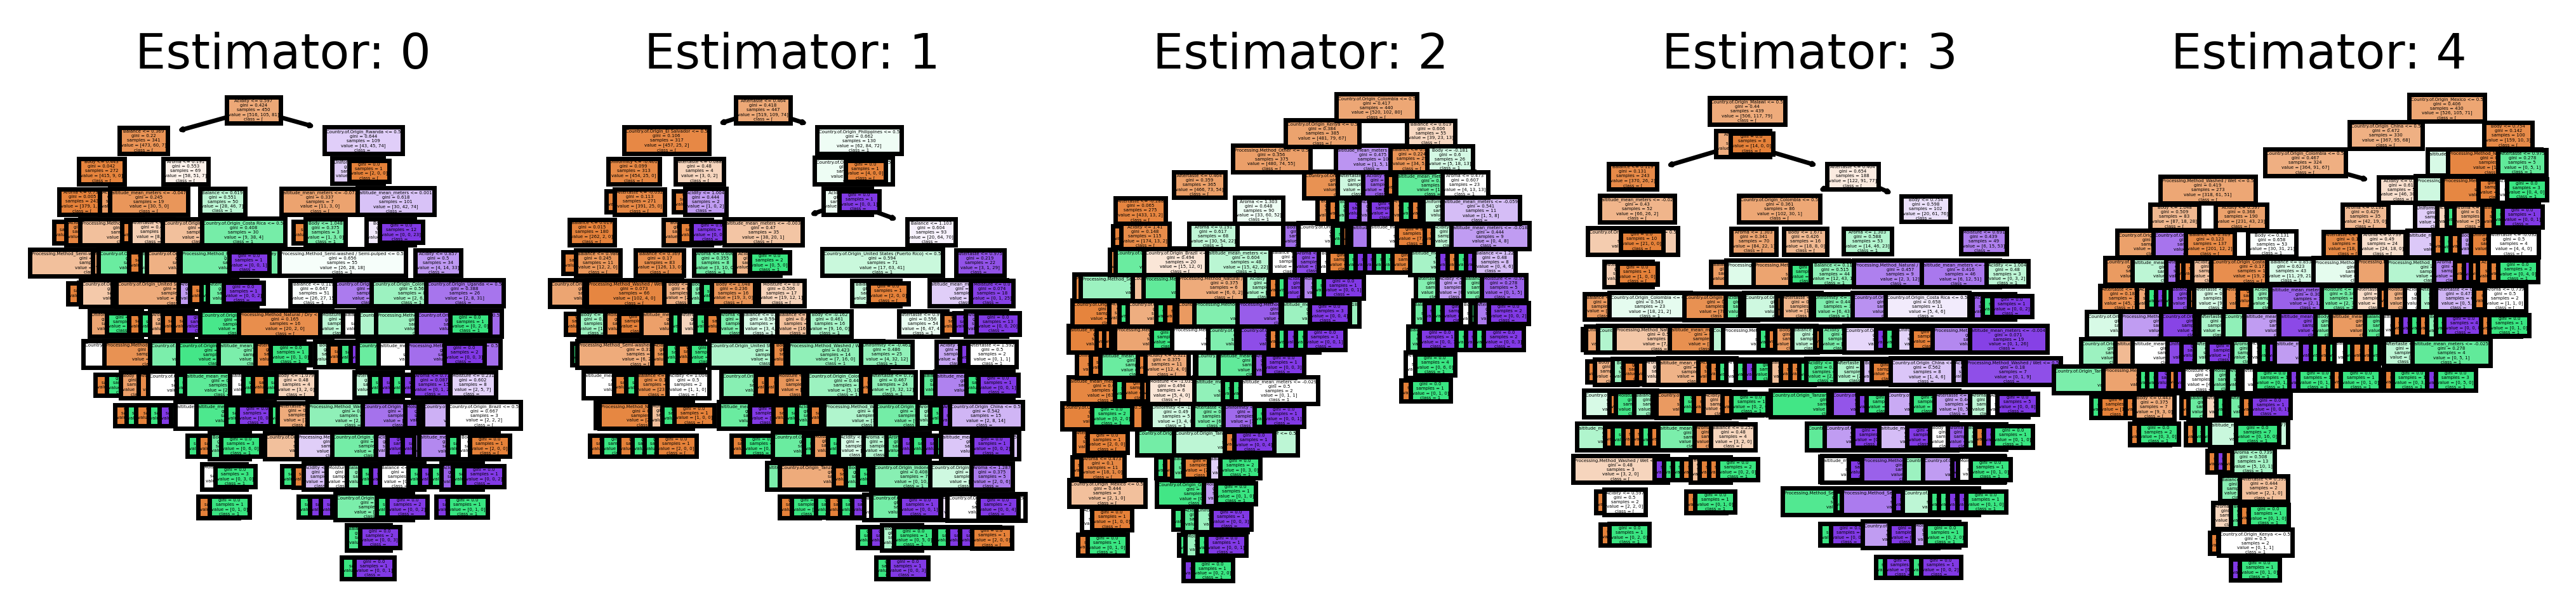

In [115]:
feature_imp = pd.Series(RandomF.feature_importances_, index = feature_names).sort_values(ascending=False)
plt.figure(figsize=(15,15))
sns.barplot(x=feature_imp, y=feature_imp.index)
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=500)
for index in range(0, 5):
    tree.plot_tree( RandomF.estimators_[index],feature_names = feature_names,class_names= Labels,filled = True,ax = axes[index]);
    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
plt.show()

In [116]:
classification = { 'KNN': KNeighborsClassifier(), 'DT': DecisionTreeClassifier(), 'RF': RandomForestClassifier() }
K_list = [1, 3, 5, 7, 9 , 11, 13, 15, 17, 19, 21, 23, 25, 35, 45]
KNN_param = dict(n_neighbors=K_list)
ASM_function = ['entropy', 'gini']
maxD = [ 4, 5, 6, None]
maxF = ['auto', 'log2', None]
minSample = [1,2, 4]
DT_param= dict(criterion=ASM_function, max_depth = maxD, min_samples_leaf = minSample, max_features = maxF)
nEst = [10, 30, 50, 100]
RF_param = dict(n_estimators= nEst, criterion=ASM_function, max_depth = maxD, min_samples_leaf = minSample,max_features = maxF)

In [117]:
for EST in classification:
    model = classification[EST]
    if (EST == 'KNN'):
        params = KNN_param
    elif(EST == 'DT'):
        params = DT_param
    else:
        params = RF_param
    grid = GridSearchCV( estimator = model,n_jobs = 1,verbose = 10,scoring = 'accuracy', cv = 2,param_grid = params )
grid_result = grid.fit(X_train,Y_train)

Fitting 2 folds for each of 288 candidates, totalling 576 fits
[CV 1/2; 1/288] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=10
[CV 1/2; 1/288] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.829 total time=   0.0s
[CV 2/2; 1/288] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=10
[CV 2/2; 1/288] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.840 total time=   0.0s
[CV 1/2; 2/288] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=30


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this 

[CV 1/2; 2/288] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=30;, score=0.860 total time=   0.1s
[CV 2/2; 2/288] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=30
[CV 2/2; 2/288] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=30;, score=0.832 total time=   0.1s
[CV 1/2; 3/288] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=50


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/2; 3/288] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.863 total time=   0.2s
[CV 2/2; 3/288] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=50


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/2; 3/288] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.838 total time=   0.2s
[CV 1/2; 4/288] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=100


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/2; 4/288] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.849 total time=   0.4s
[CV 2/2; 4/288] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=100


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/2; 4/288] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.843 total time=   0.3s
[CV 1/2; 5/288] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=10
[CV 1/2; 5/288] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=10;, score=0.852 total time=   0.0s
[CV 2/2; 5/288] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=10
[CV 2/2; 5/288] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=10;, score=0.835 total time=   0.0s
[CV 1/2; 6/288] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=30


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this 

[CV 1/2; 6/288] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=30;, score=0.863 total time=   0.0s
[CV 2/2; 6/288] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=30
[CV 2/2; 6/288] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=30;, score=0.840 total time=   0.0s
[CV 1/2; 7/288] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=50


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/2; 7/288] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.846 total time=   0.1s
[CV 2/2; 7/288] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=50


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/2; 7/288] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.849 total time=   0.1s
[CV 1/2; 8/288] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=100


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/2; 8/288] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.846 total time=   0.3s
[CV 2/2; 8/288] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=100


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/2; 8/288] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.826 total time=   0.3s
[CV 1/2; 9/288] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=10
[CV 1/2; 9/288] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=10;, score=0.843 total time=   0.0s
[CV 2/2; 9/288] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=10
[CV 2/2; 9/288] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=10;, score=0.806 total time=   0.0s
[CV 1/2; 10/288] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=30


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this 

[CV 1/2; 10/288] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=30;, score=0.849 total time=   0.0s
[CV 2/2; 10/288] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=30
[CV 2/2; 10/288] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=30;, score=0.829 total time=   0.0s
[CV 1/2; 11/288] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=50


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/2; 11/288] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=50;, score=0.849 total time=   0.1s
[CV 2/2; 11/288] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=50


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/2; 11/288] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=50;, score=0.835 total time=   0.1s
[CV 1/2; 12/288] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=100


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/2; 12/288] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=100;, score=0.852 total time=   0.3s
[CV 2/2; 12/288] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=100


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/2; 12/288] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=100;, score=0.840 total time=   0.3s
[CV 1/2; 13/288] START criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=10
[CV 1/2; 13/288] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=10;, score=0.789 total time=   0.0s
[CV 2/2; 13/288] START criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=10
[CV 2/2; 13/288] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=10;, score=0.849 total time=   0.0s
[CV 1/2; 14/288] START criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=30
[CV 1/2; 14/288] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=30;, score=0.840 total time=   0.0s
[CV 2/2; 14/288] START criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimator

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this 

[CV 2/2; 38/288] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=30;, score=0.849 total time=   0.0s
[CV 1/2; 39/288] START criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=50
[CV 1/2; 39/288] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.855 total time=   0.1s
[CV 2/2; 39/288] START criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=50


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/2; 39/288] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.855 total time=   0.1s
[CV 1/2; 40/288] START criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=100


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/2; 40/288] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.863 total time=   0.2s
[CV 2/2; 40/288] START criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=100


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/2; 40/288] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.855 total time=   0.2s
[CV 1/2; 41/288] START criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=10
[CV 1/2; 41/288] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=10;, score=0.877 total time=   0.0s
[CV 2/2; 41/288] START criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=10
[CV 2/2; 41/288] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=10;, score=0.849 total time=   0.0s
[CV 1/2; 42/288] START criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=30
[CV 1/2; 42/288] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=30;, score=0.872 total time=   0.0s
[CV 2/2; 42/288] START criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimator

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this 

[CV 2/2; 42/288] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=30;, score=0.840 total time=   0.0s
[CV 1/2; 43/288] START criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=50
[CV 1/2; 43/288] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.869 total time=   0.1s
[CV 2/2; 43/288] START criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=50


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/2; 43/288] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.863 total time=   0.1s
[CV 1/2; 44/288] START criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=100


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/2; 44/288] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.866 total time=   0.2s
[CV 2/2; 44/288] START criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=100


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/2; 44/288] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.855 total time=   0.3s
[CV 1/2; 45/288] START criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=10
[CV 1/2; 45/288] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=10;, score=0.838 total time=   0.0s
[CV 2/2; 45/288] START criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=10
[CV 2/2; 45/288] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=10;, score=0.809 total time=   0.0s
[CV 1/2; 46/288] START criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=30


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this 

[CV 1/2; 46/288] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=30;, score=0.843 total time=   0.0s
[CV 2/2; 46/288] START criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=30
[CV 2/2; 46/288] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=30;, score=0.849 total time=   0.0s
[CV 1/2; 47/288] START criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=50


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/2; 47/288] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=50;, score=0.838 total time=   0.1s
[CV 2/2; 47/288] START criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=50
[CV 2/2; 47/288] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=50;, score=0.823 total time=   0.1s
[CV 1/2; 48/288] START criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=100


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/2; 48/288] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=100;, score=0.858 total time=   0.2s
[CV 2/2; 48/288] START criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=100


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/2; 48/288] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=100;, score=0.852 total time=   0.2s
[CV 1/2; 49/288] START criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=10
[CV 1/2; 49/288] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=10;, score=0.815 total time=   0.0s
[CV 2/2; 49/288] START criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=10
[CV 2/2; 49/288] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=10;, score=0.812 total time=   0.0s
[CV 1/2; 50/288] START criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=30
[CV 1/2; 50/288] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=30;, score=0.858 total time=   0.0s
[CV 2/2; 50/288] START criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimator

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/2; 73/288] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.838 total time=   0.0s
[CV 1/2; 74/288] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=30


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/2; 74/288] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=30;, score=0.855 total time=   0.2s
[CV 2/2; 74/288] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=30


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/2; 74/288] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=30;, score=0.858 total time=   0.1s
[CV 1/2; 75/288] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=50


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/2; 75/288] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.883 total time=   0.2s
[CV 2/2; 75/288] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=50


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/2; 75/288] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.858 total time=   0.2s
[CV 1/2; 76/288] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=100


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/2; 76/288] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.877 total time=   0.4s
[CV 2/2; 76/288] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=100


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/2; 76/288] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.863 total time=   0.4s
[CV 1/2; 77/288] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=10
[CV 1/2; 77/288] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=10;, score=0.849 total time=   0.0s
[CV 2/2; 77/288] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=10
[CV 2/2; 77/288] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=10;, score=0.843 total time=   0.0s
[CV 1/2; 78/288] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=30


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this 

[CV 1/2; 78/288] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=30;, score=0.875 total time=   0.0s
[CV 2/2; 78/288] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=30
[CV 2/2; 78/288] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=30;, score=0.843 total time=   0.0s
[CV 1/2; 79/288] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=50


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/2; 79/288] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.872 total time=   0.2s
[CV 2/2; 79/288] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=50
[CV 2/2; 79/288] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.852 total time=   0.1s
[CV 1/2; 80/288] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=100


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/2; 80/288] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.892 total time=   0.4s
[CV 2/2; 80/288] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=100


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/2; 80/288] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.860 total time=   0.4s
[CV 1/2; 81/288] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=10
[CV 1/2; 81/288] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=10;, score=0.823 total time=   0.0s
[CV 2/2; 81/288] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=10
[CV 2/2; 81/288] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=10;, score=0.843 total time=   0.0s
[CV 1/2; 82/288] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=30


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this 

[CV 1/2; 82/288] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=30;, score=0.855 total time=   0.1s
[CV 2/2; 82/288] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=30
[CV 2/2; 82/288] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=30;, score=0.840 total time=   0.1s
[CV 1/2; 83/288] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=50


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/2; 83/288] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=50;, score=0.858 total time=   0.2s
[CV 2/2; 83/288] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=50
[CV 2/2; 83/288] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=50;, score=0.858 total time=   0.1s
[CV 1/2; 84/288] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=100


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/2; 84/288] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=100;, score=0.860 total time=   0.2s
[CV 2/2; 84/288] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=100


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/2; 84/288] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=100;, score=0.852 total time=   0.2s
[CV 1/2; 85/288] START criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=10
[CV 1/2; 85/288] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=10;, score=0.860 total time=   0.0s
[CV 2/2; 85/288] START criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=10
[CV 2/2; 85/288] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=10;, score=0.823 total time=   0.0s
[CV 1/2; 86/288] START criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=30
[CV 1/2; 86/288] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=30;, score=0.875 total time=   0.0s
[CV 2/2; 86/288] START criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimator

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this 

[CV 2/2; 110/288] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=30;, score=0.872 total time=   0.0s
[CV 1/2; 111/288] START criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=50
[CV 1/2; 111/288] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.877 total time=   0.1s
[CV 2/2; 111/288] START criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=50


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/2; 111/288] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.852 total time=   0.1s
[CV 1/2; 112/288] START criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 1/2; 112/288] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.889 total time=   0.3s
[CV 2/2; 112/288] START criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=100


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/2; 112/288] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.886 total time=   0.2s
[CV 1/2; 113/288] START criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=10
[CV 1/2; 113/288] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=10;, score=0.858 total time=   0.0s
[CV 2/2; 113/288] START criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=10
[CV 2/2; 113/288] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=10;, score=0.849 total time=   0.0s
[CV 1/2; 114/288] START criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=30
[CV 1/2; 114/288] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=30;, score=0.883 total time=   0.0s
[CV 2/2; 114/288] START criterion=entropy, max_depth=None, max_features=auto,

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this 

[CV 2/2; 114/288] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=30;, score=0.846 total time=   0.0s
[CV 1/2; 115/288] START criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=50
[CV 1/2; 115/288] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.889 total time=   0.1s
[CV 2/2; 115/288] START criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=50


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/2; 115/288] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.855 total time=   0.1s
[CV 1/2; 116/288] START criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=100


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/2; 116/288] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.877 total time=   0.2s
[CV 2/2; 116/288] START criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=100


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/2; 116/288] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.872 total time=   0.2s
[CV 1/2; 117/288] START criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=10
[CV 1/2; 117/288] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=10;, score=0.866 total time=   0.0s
[CV 2/2; 117/288] START criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=10
[CV 2/2; 117/288] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=10;, score=0.835 total time=   0.0s
[CV 1/2; 118/288] START criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=30
[CV 1/2; 118/288] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=30;, score=0.866 total time=   0.0s
[CV 2/2; 118/288] START criterion=entropy, max_depth=None, max_features=auto,

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this 

[CV 2/2; 118/288] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=30;, score=0.835 total time=   0.0s
[CV 1/2; 119/288] START criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=50
[CV 1/2; 119/288] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=50;, score=0.855 total time=   0.1s
[CV 2/2; 119/288] START criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=50


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/2; 119/288] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=50;, score=0.846 total time=   0.1s
[CV 1/2; 120/288] START criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=100


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/2; 120/288] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=100;, score=0.872 total time=   0.2s
[CV 2/2; 120/288] START criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=100


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/2; 120/288] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=100;, score=0.855 total time=   0.2s
[CV 1/2; 121/288] START criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=10
[CV 1/2; 121/288] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=10;, score=0.852 total time=   0.0s
[CV 2/2; 121/288] START criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=10
[CV 2/2; 121/288] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=10;, score=0.852 total time=   0.0s
[CV 1/2; 122/288] START criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=30
[CV 1/2; 122/288] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=30;, score=0.880 total time=   0.0s
[CV 2/2; 122/288] START criterion=entropy, max_depth=None, max_features=log2,

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this 

[CV 2/2; 146/288] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=30;, score=0.840 total time=   0.0s
[CV 1/2; 147/288] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=50
[CV 1/2; 147/288] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.858 total time=   0.1s
[CV 2/2; 147/288] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=50


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/2; 147/288] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.846 total time=   0.1s
[CV 1/2; 148/288] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=100


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/2; 148/288] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.855 total time=   0.2s
[CV 2/2; 148/288] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=100


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/2; 148/288] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.835 total time=   0.2s
[CV 1/2; 149/288] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=10
[CV 1/2; 149/288] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=10;, score=0.863 total time=   0.0s
[CV 2/2; 149/288] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=10
[CV 2/2; 149/288] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=10;, score=0.835 total time=   0.0s
[CV 1/2; 150/288] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=30
[CV 1/2; 150/288] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=30;, score=0.849 total time=   0.0s
[CV 2/2; 150/288] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=30


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this 

[CV 2/2; 150/288] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=30;, score=0.846 total time=   0.0s
[CV 1/2; 151/288] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=50
[CV 1/2; 151/288] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.849 total time=   0.1s
[CV 2/2; 151/288] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=50


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/2; 151/288] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.838 total time=   0.1s
[CV 1/2; 152/288] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=100


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/2; 152/288] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.852 total time=   0.2s
[CV 2/2; 152/288] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=100


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/2; 152/288] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.823 total time=   0.2s
[CV 1/2; 153/288] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=10
[CV 1/2; 153/288] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=10;, score=0.843 total time=   0.0s
[CV 2/2; 153/288] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=10
[CV 2/2; 153/288] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=10;, score=0.803 total time=   0.0s
[CV 1/2; 154/288] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=30
[CV 1/2; 154/288] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=30;, score=0.840 total time=   0.0s
[CV 2/2; 154/288] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=30


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this 

[CV 2/2; 154/288] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=30;, score=0.812 total time=   0.0s
[CV 1/2; 155/288] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=50
[CV 1/2; 155/288] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=50;, score=0.840 total time=   0.1s
[CV 2/2; 155/288] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=50


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/2; 155/288] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=50;, score=0.821 total time=   0.1s
[CV 1/2; 156/288] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=100


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/2; 156/288] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=100;, score=0.852 total time=   0.2s
[CV 2/2; 156/288] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=100


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/2; 156/288] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=100;, score=0.829 total time=   0.2s
[CV 1/2; 157/288] START criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=10
[CV 1/2; 157/288] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=10;, score=0.826 total time=   0.0s
[CV 2/2; 157/288] START criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=10
[CV 2/2; 157/288] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=10;, score=0.852 total time=   0.0s
[CV 1/2; 158/288] START criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=30
[CV 1/2; 158/288] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=30;, score=0.821 total time=   0.0s
[CV 2/2; 158/288] START criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=30
[CV 2/2; 15

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this 

[CV 1/2; 182/288] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=30;, score=0.875 total time=   0.0s
[CV 2/2; 182/288] START criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=30
[CV 2/2; 182/288] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=30;, score=0.840 total time=   0.1s
[CV 1/2; 183/288] START criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=50


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/2; 183/288] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.875 total time=   0.1s
[CV 2/2; 183/288] START criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=50


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/2; 183/288] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.846 total time=   0.1s
[CV 1/2; 184/288] START criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=100


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/2; 184/288] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.858 total time=   0.3s
[CV 2/2; 184/288] START criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=100


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/2; 184/288] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.855 total time=   0.3s
[CV 1/2; 185/288] START criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=10
[CV 1/2; 185/288] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=10;, score=0.869 total time=   0.0s
[CV 2/2; 185/288] START criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=10
[CV 2/2; 185/288] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=10;, score=0.818 total time=   0.0s
[CV 1/2; 186/288] START criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=30


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this 

[CV 1/2; 186/288] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=30;, score=0.858 total time=   0.0s
[CV 2/2; 186/288] START criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=30
[CV 2/2; 186/288] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=30;, score=0.846 total time=   0.0s
[CV 1/2; 187/288] START criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=50


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/2; 187/288] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.852 total time=   0.1s
[CV 2/2; 187/288] START criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=50


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/2; 187/288] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.855 total time=   0.1s
[CV 1/2; 188/288] START criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=100


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/2; 188/288] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.855 total time=   0.3s
[CV 2/2; 188/288] START criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=100


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/2; 188/288] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.849 total time=   0.3s
[CV 1/2; 189/288] START criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=10
[CV 1/2; 189/288] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=10;, score=0.835 total time=   0.0s
[CV 2/2; 189/288] START criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=10
[CV 2/2; 189/288] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=10;, score=0.863 total time=   0.0s
[CV 1/2; 190/288] START criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=30


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this 

[CV 1/2; 190/288] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=30;, score=0.869 total time=   0.1s
[CV 2/2; 190/288] START criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=30
[CV 2/2; 190/288] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=30;, score=0.835 total time=   0.1s
[CV 1/2; 191/288] START criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=50


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this 

[CV 1/2; 191/288] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=50;, score=0.858 total time=   0.1s
[CV 2/2; 191/288] START criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=50
[CV 2/2; 191/288] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=50;, score=0.840 total time=   0.1s
[CV 1/2; 192/288] START criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=100


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/2; 192/288] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=100;, score=0.838 total time=   0.3s
[CV 2/2; 192/288] START criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=100


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/2; 192/288] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=100;, score=0.840 total time=   0.2s
[CV 1/2; 193/288] START criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=10
[CV 1/2; 193/288] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=10;, score=0.846 total time=   0.0s
[CV 2/2; 193/288] START criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=10
[CV 2/2; 193/288] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=10;, score=0.823 total time=   0.0s
[CV 1/2; 194/288] START criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=30
[CV 1/2; 194/288] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=30;, score=0.852 total time=   0.0s
[CV 2/2; 194/288] START criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=30
[CV 2/2; 19

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this 

[CV 2/2; 218/288] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=30;, score=0.860 total time=   0.0s
[CV 1/2; 219/288] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=50
[CV 1/2; 219/288] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.875 total time=   0.1s
[CV 2/2; 219/288] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=50


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/2; 219/288] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.852 total time=   0.1s
[CV 1/2; 220/288] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=100


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/2; 220/288] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.872 total time=   0.2s
[CV 2/2; 220/288] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=100


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/2; 220/288] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.866 total time=   0.2s
[CV 1/2; 221/288] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=10
[CV 1/2; 221/288] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=10;, score=0.858 total time=   0.0s
[CV 2/2; 221/288] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=10
[CV 2/2; 221/288] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=10;, score=0.832 total time=   0.0s
[CV 1/2; 222/288] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=30
[CV 1/2; 222/288] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=30;, score=0.866 total time=   0.0s
[CV 2/2; 222/288] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=30


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this 

[CV 2/2; 222/288] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=30;, score=0.846 total time=   0.0s
[CV 1/2; 223/288] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=50
[CV 1/2; 223/288] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.880 total time=   0.1s
[CV 2/2; 223/288] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=50


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/2; 223/288] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.840 total time=   0.1s
[CV 1/2; 224/288] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=100


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/2; 224/288] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.872 total time=   0.3s
[CV 2/2; 224/288] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=100


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/2; 224/288] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.852 total time=   0.3s
[CV 1/2; 225/288] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=10
[CV 1/2; 225/288] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=10;, score=0.866 total time=   0.0s
[CV 2/2; 225/288] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=10
[CV 2/2; 225/288] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=10;, score=0.838 total time=   0.0s
[CV 1/2; 226/288] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=30


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this 

[CV 1/2; 226/288] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=30;, score=0.863 total time=   0.0s
[CV 2/2; 226/288] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=30
[CV 2/2; 226/288] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=30;, score=0.835 total time=   0.0s
[CV 1/2; 227/288] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=50


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/2; 227/288] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=50;, score=0.863 total time=   0.1s
[CV 2/2; 227/288] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=50
[CV 2/2; 227/288] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=50;, score=0.843 total time=   0.1s
[CV 1/2; 228/288] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=100


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/2; 228/288] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=100;, score=0.852 total time=   0.3s
[CV 2/2; 228/288] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=100


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/2; 228/288] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=100;, score=0.838 total time=   0.3s
[CV 1/2; 229/288] START criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=10
[CV 1/2; 229/288] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=10;, score=0.860 total time=   0.0s
[CV 2/2; 229/288] START criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=10
[CV 2/2; 229/288] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=10;, score=0.855 total time=   0.0s
[CV 1/2; 230/288] START criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=30
[CV 1/2; 230/288] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=30;, score=0.858 total time=   0.0s
[CV 2/2; 230/288] START criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=30
[CV 2/2; 23

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this 

[CV 2/2; 254/288] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=30;, score=0.855 total time=   0.0s
[CV 1/2; 255/288] START criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=50
[CV 1/2; 255/288] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.895 total time=   0.1s
[CV 2/2; 255/288] START criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=50
[CV 2/2; 255/288] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.869 total time=   0.1s
[CV 1/2; 256/288] START criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=100


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/2; 256/288] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.897 total time=   0.3s
[CV 2/2; 256/288] START criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=100


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/2; 256/288] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.880 total time=   0.2s
[CV 1/2; 257/288] START criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=10
[CV 1/2; 257/288] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=10;, score=0.866 total time=   0.0s
[CV 2/2; 257/288] START criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=10
[CV 2/2; 257/288] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=10;, score=0.858 total time=   0.0s
[CV 1/2; 258/288] START criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=30
[CV 1/2; 258/288] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=30;, score=0.889 total time=   0.0s
[CV 2/2; 258/288] START criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, n_e

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this 

[CV 2/2; 258/288] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=30;, score=0.858 total time=   0.0s
[CV 1/2; 259/288] START criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=50
[CV 1/2; 259/288] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.877 total time=   0.1s
[CV 2/2; 259/288] START criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=50


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/2; 259/288] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.855 total time=   0.1s
[CV 1/2; 260/288] START criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=100


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/2; 260/288] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.892 total time=   0.2s
[CV 2/2; 260/288] START criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=100


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/2; 260/288] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.860 total time=   0.2s
[CV 1/2; 261/288] START criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=10
[CV 1/2; 261/288] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=10;, score=0.852 total time=   0.0s
[CV 2/2; 261/288] START criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=10
[CV 2/2; 261/288] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=10;, score=0.809 total time=   0.0s
[CV 1/2; 262/288] START criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=30
[CV 1/2; 262/288] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=30;, score=0.840 total time=   0.0s
[CV 2/2; 262/288] START criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, n_e

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this 

[CV 2/2; 262/288] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=30;, score=0.849 total time=   0.0s
[CV 1/2; 263/288] START criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=50
[CV 1/2; 263/288] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=50;, score=0.855 total time=   0.1s
[CV 2/2; 263/288] START criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=50


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/2; 263/288] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=50;, score=0.852 total time=   0.2s
[CV 1/2; 264/288] START criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=100


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/2; 264/288] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=100;, score=0.863 total time=   0.2s
[CV 2/2; 264/288] START criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=100


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/2; 264/288] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=100;, score=0.840 total time=   0.2s
[CV 1/2; 265/288] START criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=10
[CV 1/2; 265/288] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=10;, score=0.869 total time=   0.0s
[CV 2/2; 265/288] START criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=10
[CV 2/2; 265/288] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=10;, score=0.840 total time=   0.0s
[CV 1/2; 266/288] START criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=30
[CV 1/2; 266/288] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=30;, score=0.880 total time=   0.0s
[CV 2/2; 266/288] START criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=1, n_e

In [118]:
print('Best params: ',grid_result.best_params_)
print('Best score: ', grid_result.best_score_)

Best params:  {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'n_estimators': 50}
Best score:  0.8945868945868947


0.834758 (0.005698) with: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 10}
0.846154 (0.014245) with: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 30}
0.850427 (0.012821) with: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 50}
0.846154 (0.002849) with: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 100}
0.843305 (0.008547) with: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 10}
0.851852 (0.011396) with: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 30}
0.847578 (0.001425) with: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 50}
0.836182 (0.009972) with: {'criterion': 'entropy', 'max_depth

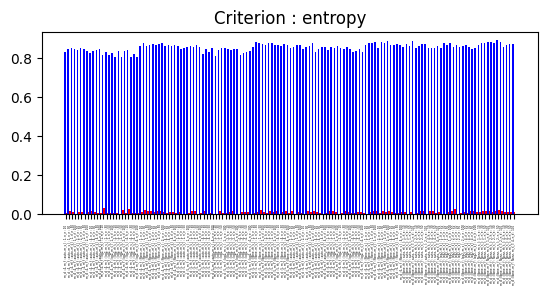

In [120]:
mean = grid_result.cv_results_['mean_test_score']
std = grid_result.cv_results_['std_test_score']
param = grid_result.cv_results_['params']
bar_mean_entropy = []
bar_mean_gini = []
bar_std_entropy = []
bar_std_gini = []
bar_param_entropy = []
bar_param_gini = []
for mean, stdev, param in zip(mean, std, param):
    print("%f (%f) with: %r" % (mean, stdev, param))
    if param['criterion'] == 'entropy':
        bar_mean_entropy.append(mean)
        bar_std_entropy.append(stdev)
        bar_param_entropy.append("m_d : "+ str(param['max_depth']) + ", m_f : " + str(param['max_features']) + ", m_s_l : " + str(param['min_samples_leaf']) + ", n_e : " + str(param['n_estimators']))
    else:
        bar_mean_gini.append(mean)
        bar_std_gini.append(stdev)
        bar_param_gini.append("m_d : "+ str(param['max_depth']) + ", m_f : " + str(param['max_features']) + ", m_s_l : " + str(param['min_samples_leaf']) + ", n_e : " + str(param['n_estimators']))
x = np.arange(len(bar_mean_entropy))
w = 0.5
fig, ax = plt.subplots()
fig = plt.title('Criterion : entropy')
rect1 = plt.bar(x-w/2,bar_mean_entropy,w,color = 'b')
rect2 = plt.bar(x+w/2,bar_std_entropy,w,color = 'r')
ax.set_xticks(x, labels= bar_param_entropy,rotation = 90,fontsize = 2)
plt.subplots_adjust(bottom=0.50)
plt.show()